In [103]:
from dotenv import load_dotenv
import pandas as pd
import csv
import os
import base64
import requests
from scipy.stats import linregress
import json
import matplotlib.pyplot as plt
from pprint import pprint
from ids import id
from ids import secret

In [104]:
load_dotenv()
client_id = id
client_secret = secret

# Asegurarse de que los Id's están presentes, porque si no, la función get token da error.
# print(client_id, client_secret)

In [105]:
# Definiendo funciones <3

def get_token():
    auth_string = client_id + ":" + client_secret
    auth_bytes = auth_string.encode("utf-8")
    auth_base64 = str(base64.b64encode(auth_bytes), "utf-8")

    url = "https://accounts.spotify.com/api/token"
    headers = {
        "Authorization" : "Basic " + auth_base64,
        "Content-Type" : "application/x-www-form-urlencoded"
    }

    data = {"grant_type" : "client_credentials"}

    result = requests.post(url, headers = headers, data = data)
    json_response = json.loads(result.content)
    token = json_response["access_token"]
    return token

def get_auth_header(token):
    return{"Authorization" : "Bearer " + token}

def search_for_playlist(token, playlist_name):
    url = "https://api.spotify.com/v1/search"
    headers = get_auth_header(token)
    query = f"?q={playlist_name}&type=playlist&limit=1"
    query_url = url + query
    result = requests.get(query_url, headers = headers)
    json_result_playlist = json.loads(result.content)["playlists"]["items"]
    if len(json_result_playlist) == 0:
        print("No playlist with this name found...")
        return None
    
    # pprint(json_result_playlist)
    return json_result_playlist[0]

def get_songs_in_playlist(token, artist_id):
    url = f"https://api.spotify.com/v1/playlists/{playlist_id}"
    headers = get_auth_header(token)
    result = requests.get(url, headers = headers)
    json_result = json.loads(result.content)["tracks"]["items"]
    # pprint(json_result)
    return json_result


In [106]:
token = get_token()
result = search_for_playlist(token, "Top Canciones 2019")
playlist_id = result["id"]
songs = get_songs_in_playlist(token, playlist_id)
song_list = []
for idx, song in enumerate(songs):
    # print(f'{idx + 1}. {song["track"]["name"]}')
    song_data = {"Song":song["track"]["name"],
                 "Artist":song["track"]["artists"][0]["name"],
                 "Song Lenght (ms)":song["track"]["duration_ms"],
                 "Popularity":song["track"]["popularity"],
                 "Release date":song["track"]["album"]["release_date"],
                 "Song Id":song["track"]["id"]}
    song_list.append(song_data)
# pprint(song_list)
# pprint(songs)
spoti_19 = pd.DataFrame(song_list)
spoti_19.head()

,Song,Artist,Song Lenght (ms),Popularity,Release date,Song Id
0,Calma - Remix,Pedro Capó,238200,77,2018-10-05,5iwz1NiezX7WWjnCgY5TH4
1,Con Calma,Daddy Yankee,193226,83,2019-01-24,5w9c2J52mkdntKOmRLeM2m
2,Te Vi,Piso 21,231848,81,2018-12-14,059bcIhyc2SBwm6sw2AZzd
3,Otro Trago,Sech,225933,75,2019-04-19,1Ej96GIBCTvgH7tNX1r3qr
4,Callaita,Bad Bunny,250533,80,2019-05-31,2TH65lNHgvLxCKXM3apjxI


In [107]:
#Tomar la columna Song Id del DataFrame con los Top Tracks y convertir los valores en una lista de strings separadas por comas, para pasarlo así al request de los Audio Features

id_list = spoti_19["Song Id"]
id_list = ",".join(id_list)
id_list


'5iwz1NiezX7WWjnCgY5TH4,5w9c2J52mkdntKOmRLeM2m,059bcIhyc2SBwm6sw2AZzd,1Ej96GIBCTvgH7tNX1r3qr,2TH65lNHgvLxCKXM3apjxI,0s5DNDV6LAKn2u2Ufa3VjQ,1LIqNVhaIgxXUt2eVoIQJ3,5W83ErFkO3aKAIS1WMi6u0,0fea68AdmYNygeTGI4RC18,6FyRXC8tJUh863JCkyWqtk,7KbF6AdprOXEEHlsq11Z6d,1c0hsvHLELX6y8qymnpLKL,2qG5sZ7Si6sdK74qLxedYM,46lvmzK8wxAy66tjzXXSh0,2ksOAxtIxY8yElEWw8RhgK,2beS6dD5rovBxSA1zYoSHR,7g8YaUQABMal0zWe7a2ijz,3f5lA8nnc4YYF1qf78WpHw,5BDP2tky8oMQJPS33frKVp,3gE4eQH3K83Sght0ZLvuBK,6WkJ2OK163XXS2oARUC9JM,3KkXRkHbMCARz0aVfEt68P,6ocbgoVGwYJhOv1GgI9NsF,0TK2YIli7K1leLovkQiNik,2Fxmhks0bxGSBdJ92vM42m,6o8ogTrSX8H0F66Pdz3Tsc,7hbk4BaF66O09R1gq0bKwj,4lzxJ4jCuFDXXGkE1LmpKR,5PXsZaT8cOxb4mXrA20PMQ,4PJ3umtW1aWdfh5EITHc6T,0KHhNlHN5lWn7q332PiPys,0KoiMHhqKLoL4xM54rcWYY,25ZAibhr3bdlMCLmubZDVt,0akyEssGRVHstqCSWXusJL,4THusowxdHxwt0HBh5pyRx,32lexhcz93AinKK0qLTZaZ,1LiN0Z98FkR1t0m8KmLcAH,1nocRtwyNPVtGcIJqfgdzZ,7BuHdm4lQqcyG3qTwdkxus,4Clmg1g8n2yBYG13Z1oSdG,4yVO0wOhXsZC1RuPgHP524,2LIh4uzqq9cXMPzzmcToHl,1mT47pKLXUwPYGwB91GcNz,6De0lHrwBf

In [108]:
#Request para los Audio Features

def get_AF_in_songs(token, id_list):
    url = f"https://api.spotify.com/v1/audio-features?ids={id_list}"
    headers = get_auth_header(token)
    response = requests.get(url, headers = headers)
    response_json = response.json()
    #pprint(response_json)
    return response_json

In [109]:
token = get_token()
audio_features_data = get_AF_in_songs(token, id_list)["audio_features"]
audio_features_list = []


for idx, af in enumerate(audio_features_data):
    audio_features = {"Acousticness":af["acousticness"],
                 "Danceability":af["danceability"],
                 "Energy":af["energy"],
                 "Instrumentalness":af["energy"],
                 "Liveness":af["energy"],
                 "Speechiness":af["speechiness"],
                 "Tempo":af["tempo"],
                 "Valence":af["valence"]}
    audio_features_list.append(audio_features)
audio_features_df = pd.DataFrame(audio_features_list)
#audio_features_df

spoti_19_af_df = pd.concat([spoti_19, audio_features_df], axis = 1)
clean_spoti_df = pd.DataFrame(spoti_19_af_df.loc[spoti_19_af_df["Popularity"]>40, :])
clean_spoti_df


,Song,Artist,Song Lenght (ms),Popularity,Release date,Song Id,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Speechiness,Tempo,Valence
0,Calma - Remix,Pedro Capó,238200,77,2018-10-05,5iwz1NiezX7WWjnCgY5TH4,0.3230,0.826,0.773,0.773,0.773,0.0524,126.899,0.761
1,Con Calma,Daddy Yankee,193226,83,2019-01-24,5w9c2J52mkdntKOmRLeM2m,0.1100,0.737,0.860,0.860,0.860,0.0593,93.989,0.656
2,Te Vi,Piso 21,231848,81,2018-12-14,059bcIhyc2SBwm6sw2AZzd,0.0446,0.877,0.777,0.777,0.777,0.1170,102.020,0.706
3,Otro Trago,Sech,225933,75,2019-04-19,1Ej96GIBCTvgH7tNX1r3qr,0.1360,0.746,0.700,0.700,0.700,0.3410,176.044,0.619
4,Callaita,Bad Bunny,250533,80,2019-05-31,2TH65lNHgvLxCKXM3apjxI,0.6000,0.610,0.624,0.624,0.624,0.3090,176.169,0.244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sucker,Jonas Brothers,181026,84,2019-06-07,22vgEDb5hykfaTwLuskFGD,0.0427,0.842,0.734,0.734,0.734,0.0588,137.958,0.952
96,Cuando Nadie Ve,Morat,219586,82,2018-10-25,71iAechwVKGu26pahzFL0k,0.1330,0.806,0.778,0.778,0.778,0.0616,95.993,0.840
97,Que Le De,Rauw Alejandro,225600,60,2019-01-25,08aYFNUTIOMGq93e2VSArQ,0.1900,0.770,0.750,0.750,0.750,0.0785,99.997,0.609
98,Ponle,Rvssian,164764,67,2018-09-06,28O1p0bQXH2F6Qn8jBZZR4,0.1880,0.857,0.772,0.772,0.772,0.1950,94.030,0.589


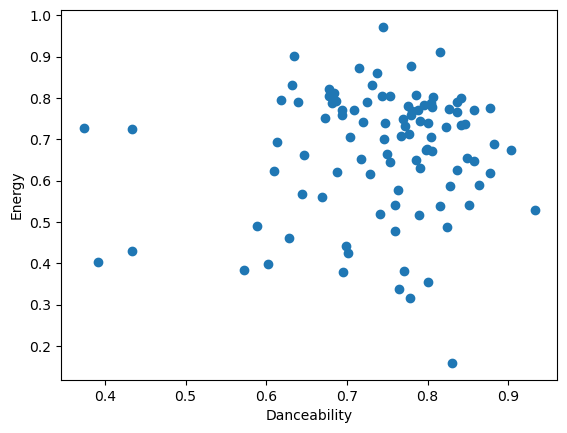

In [110]:
plt.scatter(clean_spoti_df["Danceability"], clean_spoti_df["Energy"])
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.show()

In [111]:
# Define a function to create Linear Regression plots
def lin_reg(x_values, y_values, title, line_place):
    slope, y_intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    reg_values = x_values * slope + y_intercept
    line = f"Y = {str(round(slope , 2))} + X + {str(round(y_intercept, 2))}"
    plt.scatter(x_values, y_values, facecolor = "blue", edgecolor = "black")
    plt.plot(x_values, reg_values, color = "red")
    plt.annotate(line, line_place, color = "green", fontsize = 12 )
    plt.xlabel(x_values.name)
    plt.ylabel(y_values.name)
    plt.show()
    print(str(title))
    print(f"The r value is: {rvalue}")

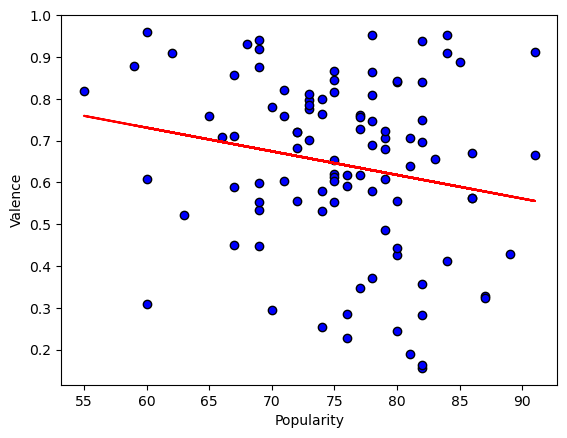

Popularity vs. Valence
The r value is: -0.1972024068816241


In [112]:
# Linear regression Test
x_values = clean_spoti_df["Popularity"]
y_values = clean_spoti_df["Valence"]

lin_reg(x_values, y_values, "Popularity vs. Valence", (0, 0))